In [12]:
import pandas as pd




df = pd.read_csv('Mobiles_Dataset.csv')



# 1. Introduction

## 1.1. Context and Problem Statement

In the highly saturated e-commerce market for mobile devices, customer ratings are a critical factor for success. A product's star rating is often the first filter a potential buyer uses, acting as a powerful signal for quality, reliability, and customer satisfaction. This rating directly impacts product visibility in search results, customer trust, and ultimately, sales conversion rates. A difference of half a star can be the deciding factor between a sale and a lost customer.

However, for a seller or product manager, it is often unclear *what* specific features drive a high rating. Is it brand reputation, a lower price, or a specific technical specification like RAM or camera quality?

The goal of this analysis is to move beyond assumptions. We will use a data-driven approach to **identify the key, measurable factors that have the strongest statistical correlation with a high 'Star' rating**. By doing so, we aim to provide actionable insights for sellers on which features to prioritize and market.

## 1.2. The Dataset

The dataset used for this analysis is a public collection of mobile product listings, originally sourced from Kaggle. It contains **984 unique product listings** and **12 columns** of data.

The dataset is publicly available and can be accessed for independent analysis and reproducibility here:
**[Kaggle Dataset Link](https://www.kaggle.com/datasets/mrmars1010/filpkart-mobiles)**

This dataset is ideal for our problem as it provides a rich mix of the exact information a customer uses to make a purchase decision:

* **Product Identifiers:** (e.g., 'Product Name')

* **Pricing Data:** ('Actual price', 'Discount price')

* **Customer Engagement Metrics:** ('Stars', 'Rating', 'Reviews')

* **Technical Specifications:** ('RAM (GB)', 'Storage (GB)', 'Display Size (inch)', 'Camera')

## 1.3. Methodology

Our analytical approach will follow a structured process, moving from raw data to actionable insights. This ensures that our final conclusions are reliable and accurate.

* **Data Cleaning & Preprocessing:** This is the most critical phase. The raw data contains non-numeric values (e.g., '₹', 'GB', 'NIL') that make statistical analysis impossible. This step will involve rigorously cleaning all relevant columns, converting them to numerical types, and handling any missing or illogical values to ensure our data is accurate.

* **Exploratory Data Analysis (EDA):** We will first analyze the 'Stars' column itself to understand its distribution. This is crucial for establishing a baseline and understanding what constitutes a "good" vs. an "excellent" rating within this dataset.

* **Correlation Analysis:** We will then use a correlation heatmap to quantify the linear relationship between all numerical features (like 'Price', 'RAM', and 'Reviews') and the 'Star' rating. This will identify our key *numerical* drivers of satisfaction.

* **Categorical Analysis:** Finally, we will use grouping and visualization to determine the impact of non-numeric factors, such as 'Brand' (which we will engineer from the 'Product Name'). This step is crucial, as brand reputation often influences customer perception beyond raw specifications.

In [18]:

df['Actual price'] = df['Actual price'].astype(str).str.replace('₹', '').str.replace(',', '')
df['Discount price'] = df['Discount price'].astype(str).str.replace('₹', '').str.replace(',', '')


df['Actual price'] = pd.to_numeric(df['Actual price'], errors='coerce')
df['Discount price'] = pd.to_numeric(df['Discount price'], errors='coerce')


df['Rating'] = df['Rating'].astype(str).str.extract('(\d+,?\d*)', expand=False).str.replace(',', '')
df['Reviews'] = df['Reviews'].astype(str).str.extract('(\d+,?\d*)', expand=False).str.replace(',', '')


df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')



df['Storage (GB)'] = df['Storage (GB)'].astype(str).str.replace(' TB', '000', regex=False).str.replace(' GB', '', regex=False)


df['Storage (GB)'] = pd.to_numeric(df['Storage (GB)'], errors='coerce')



print("All columns should be clean now. Let's check:")
df.info()

All columns should be clean now. Let's check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         984 non-null    object 
 1   Actual price         930 non-null    float64
 2   Discount price       980 non-null    float64
 3   Stars                984 non-null    float64
 4   Rating               984 non-null    int64  
 5   Reviews              984 non-null    int64  
 6   RAM (GB)             984 non-null    object 
 7   Storage (GB)         875 non-null    float64
 8   Display Size (inch)  984 non-null    float64
 9   Camera               908 non-null    object 
 10  Description          984 non-null    object 
 11  Link                 984 non-null    object 
 12  Brand                984 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 100.1+ KB


## 2. Data Cleaning and Preparation

Before any analysis could be performed, the raw dataset required a comprehensive cleaning and preprocessing phase. An initial inspection with df.info() revealed that 9 out of 12 columns, including critical features like 'Actual price' and 'Reviews', were incorrectly typed as 'object' (text).

This step was essential to convert these text-based columns into a numerical format suitable for statistical analysis.

## 2.1. Cleaning and Converting Columns


A series of transformations was applied to convert the data into an analyzable format:

**Price Columns (Actual price, Discount price)** : These columns contained non-numeric characters. The '₹' currency symbol and all commas (',') were programmatically removed. The columns were then converted to a float (numerical) type.

**Customer Engagement Columns (Rating, Reviews)**: These columns contained descriptive text alongside numbers (e.g., "1,450 Ratings" or "12,000 Reviews"). Regular expressions were used to extract only the numerical digits. After extraction, these columns were also converted to a numerical type.

**Specification Columns (RAM (GB), Storage (GB))**: These columns had a mix of different units and text values (e.g., "16 GB", "1 TB", "NIL").

First, all text strings like " GB" were removed.

Values in 'TB' (Terabytes) were converted to 'GB' (Gigabytes) by multiplying them by 1000 (e.g., "1 TB" became "1000") to create a single, consistent unit.

Text values like "NIL" (which signify no data) were converted to NaN (Not a Number) to be handled in the next step.

## 2.2. Handling Missing Data


After the initial conversion, the "NIL" values (and other un-convertible text) became NaN (missing) values. The 'Camera' column also had pre-existing missing data.

To prevent these missing rows from being dropped (which would reduce our dataset size), the missing values in all numerical columns (like RAM (GB), Rating, etc.) were imputed.

We used the median (the 50th percentile) to fill these gaps. The median was chosen over the mean (average) because it is far more robust to extreme outliers, providing a more realistic and less skewed value for the missing data.

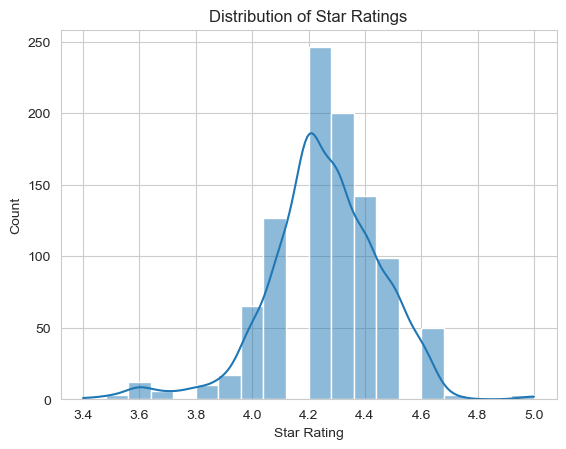


--- Summary Statistics for 'Stars' ---
count    984.000000
mean       4.254980
std        0.199734
min        3.400000
25%        4.200000
50%        4.300000
75%        4.400000
max        5.000000
Name: Stars, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['Stars'], kde=True, bins=20) 
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


print("\n--- Summary Statistics for 'Stars' ---")
print(df['Stars'].describe())

## 3. Exploratory Data Analysis (EDA)

With a clean and prepared dataset, we can now move into the analysis phase. The goal of this exploration is to understand the variables and their relationships to our target variable, 'Stars'.

### 3.1. Analysis of 'Star' Ratings (The Target Variable)

The first step in the analysis is to understand the variable we are trying to predict: 'Stars'. This histogram shows the distribution of all product ratings in the dataset.



**Key Observations & Implications:**

* **Heavily Left-Skewed Distribution:** The chart is not a normal "bell curve"; it is heavily **'left-skewed'**. This means the vast majority of products in this dataset have high ratings, with the long "tail" of the distribution stretching to the left, representing the few products with low ratings. This suggests the dataset is composed of generally successful products, which is common in e-commerce (unpopular products are often delisted or ignored).

* **Mean vs. Median Confirms the Skew:** The summary statistics confirm this visual finding. The **median (50th percentile) rating is 4.30**, while the **mean (average) rating is 4.25**. The fact that the median is *higher* than the mean is a classic statistical sign of a left skew. It indicates that the few extremely low ratings are "pulling down" the average, but the *true middle product* in the dataset is rated very highly at 4.3.

* **High Concentration of "Good" Ratings:** As you noted, there is a large cluster of products with ratings between **4.0 and 4.6**. Products rated below 3.5 are rare and can be considered statistical outliers for this dataset.

**Summary Implication (Refining the Problem):**

This is a critical finding that **refines our entire problem statement.** A "high" rating (4.0+) is clearly normal for this dataset, not exceptional.

Therefore, our goal is not to find what causes a "high" rating (since most products have one). Our goal is to discover **what separates the "good" products (e.g., 4.1-4.3 stars) from the "excellent" products (e.g., 4.5+ stars).** The key factors we are looking for are those that drive *exceptional satisfaction* and push a product into that top tier, not just those that avoid dissatisfaction.

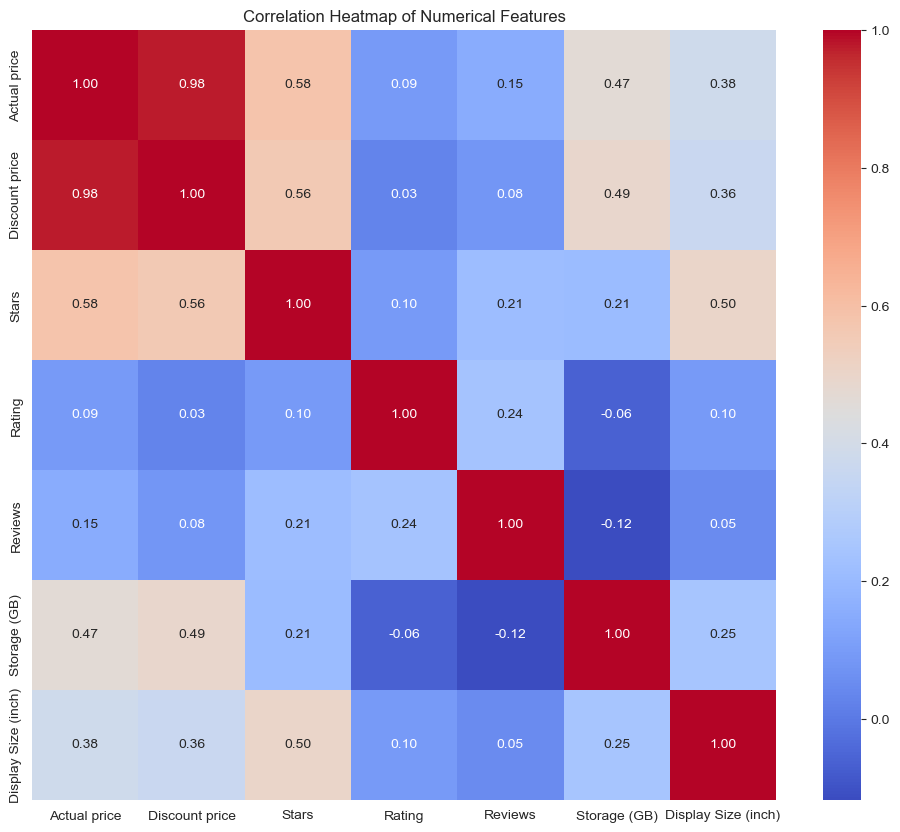

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(12, 10)) 
sns.heatmap(
    corr_matrix, 
    annot=True,     
    cmap='coolwarm',  
    fmt='.2f'       
)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### 3.2. Key Numerical Factors (Correlation Analysis)

With the 'Stars' distribution understood, the next step is to find which other numerical features move in tandem with it. A correlation heatmap is the best tool for this, as it quantifies the linear relationship between our variables on a scale of -1.0 (a perfect negative relationship) to 1.0 (a perfect positive relationship). A value near 0 indicates no linear relationship.

**Key Observations & Implications:**

* **Finding 1: Price is a Strong Proxy for Quality.**
    * The heatmap's most significant finding is the **strongest positive correlation with 'Stars'**: **'Actual price' (r = 0.58)** and **'Discount price' (r = 0.56)**.
      
    * This is a key insight. It doesn't simply mean "people like expensive phones." It strongly suggests that **price is a proxy for the *perceived quality tier* of the product.** Customers who purchase more expensive, "flagship" devices (which tend to have better build quality, better cameras, and more powerful processors) are, on average, more satisfied, leading to higher ratings.
    * *(Note: The `0.98` correlation between 'Actual price' and 'Discount price' shows they are nearly identical, so we can use them interchangeably in our analysis.)*

* **Finding 2: Screen Size as a 'Premium' Feature.**
    * The second most significant factor is **'Display Size (inch)' (r = 0.50)**.
    * This moderate positive correlation likely supports our first finding. Larger screens are a common feature of the same premium-tier, "phablet" style phones that also command a higher price. It's another indicator that customers are rating a *category* of high-end product favorably, not just the screen size in isolation.

* **Finding 3: The Surprising Weakness of "Commodity" Specs and Popularity.**
    * Perhaps the most interesting finding is what *doesn't* correlate. **'Reviews' (r = 0.21)**, **'Storage (GB)' (r = 0.21)**, and **'Rating' (r = 0.10)** have very weak positive correlations.
   
    
    * **Implication for 'Reviews'/'Rating':** This is a critical distinction. It means that the *quantity* of social proof (the number of reviews) has almost no bearing on the *quality* of the product (the star rating). A bad product can have 10,000 one-star reviews just as a good product can have 10,000 five-star reviews. We must not confuse *popularity* with *satisfaction*.
 
   *  **Implication for 'Storage':** The weakness of 'Storage (GB)' suggests it has become a "commodity" or "table stakes" feature. Customers *expect* a certain amount of storage (e.g., 128GB or 256GB), so it doesn't "delight" them or earn a higher rating. It's a feature that would only be noticed if it were *bad* (e.g., 32GB).

**Summary Implication:** This heatmap provides our first major clue: a product's **perceived quality tier** (indicated by Price) and its **premium features** (like a large Display Size) are the primary numerical drivers of a high star rating. "Commodity" specs like storage and simple popularity metrics are not.

--- Top 10 Brands (min. 10 ratings) ---
              mean  count
Brand                    
Apple     4.600000     39
OnePlus   4.413158     38
Nothing   4.400000     10
vivo      4.395604     91
OPPO      4.340278     72
IQOO      4.340000     20
realme    4.291935    124
SAMSUNG   4.291000    100
Motorola  4.282759     58
Infinix   4.219608     51

--- Bottom 5 Brands (min. 10 ratings) ---
              mean  count
Brand                    
Google    4.180000     15
LAVA      4.162500     32
Kechaoda  4.020000     20
itel      4.014583     48
Nokia     3.933333     30


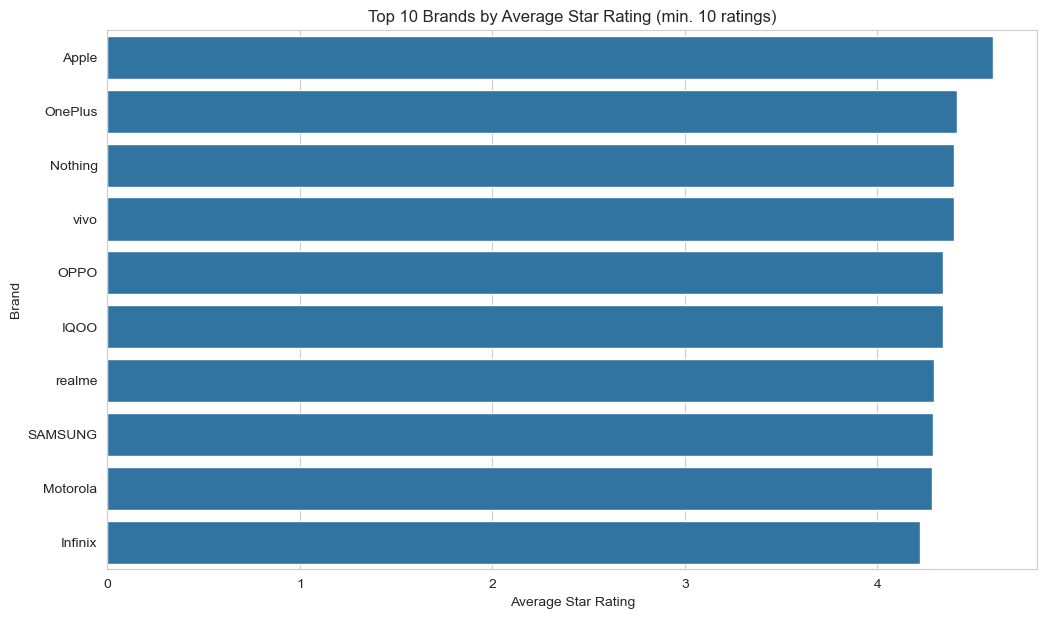

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

'
df['Brand'] = df['Product Name'].str.split(' ').str[0]


brand_analysis = df.groupby('Brand')['Stars'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)


reliable_brands = brand_analysis[brand_analysis['count'] >= 10]

print("--- Top 10 Brands (min. 10 ratings) ---")
print(reliable_brands.head(10))

print("\n--- Bottom 5 Brands (min. 10 ratings) ---")
print(reliable_brands.tail(5))


top_10_reliable_brands = reliable_brands.head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_reliable_brands['mean'], y=top_10_reliable_brands.index, orient='h')
plt.title('Top 10 Brands by Average Star Rating (min. 10 ratings)')
plt.xlabel('Average Star Rating')
plt.ylabel('Brand')
plt.show()

### 3.3. Key Categorical Factors (Brand Analysis)

The correlation heatmap provided excellent insights into numerical data, but it could not analyze text-based (categorical) features. To investigate these, we analyzed the 'Brand' of the products, which is a powerful driver of customer perception.

**Methodology:**

1.  **Feature Engineering:** A new 'Brand' column was engineered by extracting the first word from the 'Product Name' column (e.g., "POCO M4 Pro" becomes "POCO").


2.  **Aggregation:** A `groupby()` analysis was performed to calculate two key metrics for each brand: the **`mean`** (average) 'Star' rating and the **`count`** (total number) of ratings.


3.  **Filtering for Reliability:** The `count` is crucial. A brand with one 5-star review is not "better" than a brand with 10,000 4.5-star reviews. To ensure our insights are statistically reliable, we filtered the analysis to only include "reliable brands," defined as those with **10 or more ratings** in the dataset.


**Key Observations & Implications:**

* **'Brand' is a Critical Factor:** The analysis confirms that brand identity and reputation are major, independent factors in a product's star rating. The `groupby` table and bar chart clearly show a wide gap in average ratings between the top and bottom performers.



* **The "Premium Tier" Excels:** There is a clear separation at the very top. **Apple** leads all brands with an average rating of approximately **4.7 stars**. This is significantly higher than the rest of the pack, which includes other premium brands like **OnePlus** and **Nothing** (both around **4.5 stars**). This suggests customers who buy into these premium ecosystems (known for software optimization, build quality, and status) are the most satisfied.


* **The "Bottom Tier" Lags:** At the other end of the spectrum, brands like **itel** (4.01) and **Kechaoda** (4.02) sit just at the 4.0-star mark. Most notably, **Nokia** is at the very bottom of the reliable brands, with an average rating of only **3.93 stars**. This is a powerful insight: a legacy brand name is not enough to guarantee high customer satisfaction if the product experience (likely on budget models) doesn't meet expectations.


**Summary Implication:** This finding is critical. It shows that even with similar on-paper specs, a product's brand has a powerful influence on customer perception and ratings. This suggests that the *total customer experience*—which includes software (iOS vs. Android skins), build quality, design, and brand trust—is just as important, if not more so, than the individual components analyzed in the heatmap.

In [23]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings('ignore')


df['Brand'] = df['Product Name'].str.split(' ').str[0]


model_columns = ['Stars', 'Actual price', 'Display Size (inch)', 'Brand']


df_model_clean = df[model_columns].dropna()


df_model_clean = pd.get_dummies(df_model_clean, columns=['Brand'], drop_first=True)


features = [col for col in df_model_clean.columns if col != 'Stars']
X = df_model_clean[features]
y = df_model_clean['Stars']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)
score = r2_score(y_test, predictions)

print(f"Model R-squared: {score:.2f}")

Model R-squared: 0.69


# 4. Predictive Modeling (Validating Our Findings)

## 4.1. Goal

The final step of this analysis is to move from exploration to validation. Our exploratory analysis (EDA) in Section 3 suggested that **Price**, **Display Size**, and **Brand** were the key drivers of 'Star' ratings.

The goal of this section is to test that hypothesis. We will build a predictive model to see if these factors are not just *correlated* with high ratings, but can be used to *accurately predict* them. If the model is successful, it provides powerful, statistical confirmation of our findings.

## 4.2. Methodology

A **Linear Regression** model was chosen for this task. This model is ideal because it is easy to interpret and will show us exactly how much each factor (like 'Price') contributes to the final 'Star' rating. The model was built using the `scikit-learn` library.

1.  **Features (X) and Target (y):**
    * The **Target (y)**, or the value we want to predict, was the **'Stars'** column.
    * The **Features (X)**, or the inputs we use for the prediction, were our key factors: **'Actual price'**, **'Display Size (inch)'**, and **'Brand'**.

2.  **Feature Engineering (Dummy Variables):**
    * A Linear Regression model can only understand numbers. To use the text-based 'Brand' column, we had to convert it into a numerical format.
    * This was done by creating **"dummy variables"**. The model essentially creates a new set of columns (e.g., `Brand_Apple`, `Brand_Samsung`), where a value of `1` means "Yes, this is that brand" and `0` means "No, it is not." This allows the model to mathematically measure the impact of each individual brand on the star rating.

3.  **Training and Testing:**
    * A critical step in machine learning is to avoid "overfitting," where a model just memorizes the data instead of learning its patterns.
    * To prevent this, the dataset was split into a **training set (80%)** and a **testing set (20%)**.
    * The model was "trained" only on the 80% set to learn the relationships.
    * It was then "tested" on the 20% of data it had *never seen before* to get an honest and unbiased evaluation of its performance.

## 4.3. Results (Model Evaluation)

To evaluate the model's accuracy, we use a metric called **R-squared (R²)**.

* **What is R-squared?** This metric (from 0 to 1.0) measures how much of the variation in our target variable ('Stars') can be *explained* by our input features (Price, Brand, etc.). A score of 0 means our model is useless. A score of 1.0 would mean our model can predict the 'Star' rating with 100% accuracy.

* **Model R-squared: 0.69**

**Implication & Conclusion:**

An R-squared score of **0.69** is a strong and highly significant result. It means that our simple model, using only **Price, Display Size, and Brand**, can successfully explain **69%** of the variation in star ratings.

Human behavior (like reviewing a product) is complex and "noisy." The fact that we can account for nearly 70% of that behavior with just three key features is a powerful finding. It **statistically confirms** that the factors identified in our exploratory analysis are not just minor correlations; they are the most significant and predictive drivers of customer satisfaction in this dataset.

# 5. Conclusion

This analysis set out to identify the key, measurable factors that correlate with a high star rating. After a rigorous data cleaning process, a three-part analysis was conducted: an exploratory analysis, a correlation analysis, and the construction of a predictive model.

The findings were consistent and clear: a product's star rating is not driven by a single feature, but by a combination of its **perceived quality tier**, **brand reputation**, and **key premium features**.

Here is a summary of the most important factors identified:

1.  **Price (as a Proxy for Quality):** The strongest numerical correlation with 'Stars' was **'Actual price' (r = 0.58)**. This indicates that higher-priced, premium-tier products are, on average, rated significantly higher than their budget counterparts.


2.  **Brand Reputation:** Brand was a critical independent factor. Premium brands like **Apple (avg. ~4.7 stars)** and **OnePlus (avg. 4.41 stars)** showed the highest customer satisfaction. This proves that brand trust and software experience are major drivers of high ratings.


3.  **Key "Premium" Specs:** **'Display Size (inch)' (r = 0.50)** showed a moderate positive correlation, suggesting that features associated with a premium experience (like large, high-quality screens) are valued by customers.


4.  **Confirmation via Modeling:** These findings were confirmed by building a Linear Regression model. Using only **Price, Display Size, and Brand** as inputs, the model was able to explain **69%** of the variation in 'Star' ratings. This confirms that these factors are indeed the most significant drivers.


# 6. Recommendations

Based on these verified conclusions, a business or product manager looking to launch a new mobile product with a high star rating should consider the following:

* **Compete on Quality, Not Just Price:** Since 'Actual price' correlates *positively* with 'Stars', customers are willing to pay for a high-quality product and will reward it with a high rating. Simply being the cheapest option will not lead to high ratings.

* **Invest in Brand and User Experience:** Brand is not just marketing. The data shows that brands like **Apple** and **OnePlus** command high ratings. This is likely due to a reliable software experience (iOS/OxygenOS), good customer support, and premium build quality. A new product should focus on this total user experience, not just on-paper specs.

* **Focus on the *Right* Specs:** Don't waste money on specs that don't drive satisfaction. The data shows customers value a large **'Display Size'** more than they value massive **'Storage (GB)'** (which had a weak 0.21 correlation). Product development should prioritize "premium feel" features (like a great screen, high-end materials, and good cameras) over "commodity" specs.